<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
print(f"Number of rows:{movies.shape[0]}, number of columns:{movies.shape[1]} ")

'Number of rows:979, number of columns:6 '

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# Answer:
avg_duration = movies["duration"].mean()
print(f"The average duration is {avg_duration} minutes")

The average duration is 120.97957099080695 minutes


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [28]:
# Answer:
duration_sorted = movies["duration"].sort_values().reset_index(drop=True)

print(f"The shortest duration is {duration_sorted.iloc[0]}")
print(f"The longest duration is {duration_sorted.iloc[-1]}")

The shortest duration is 64
The longest duration is 242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

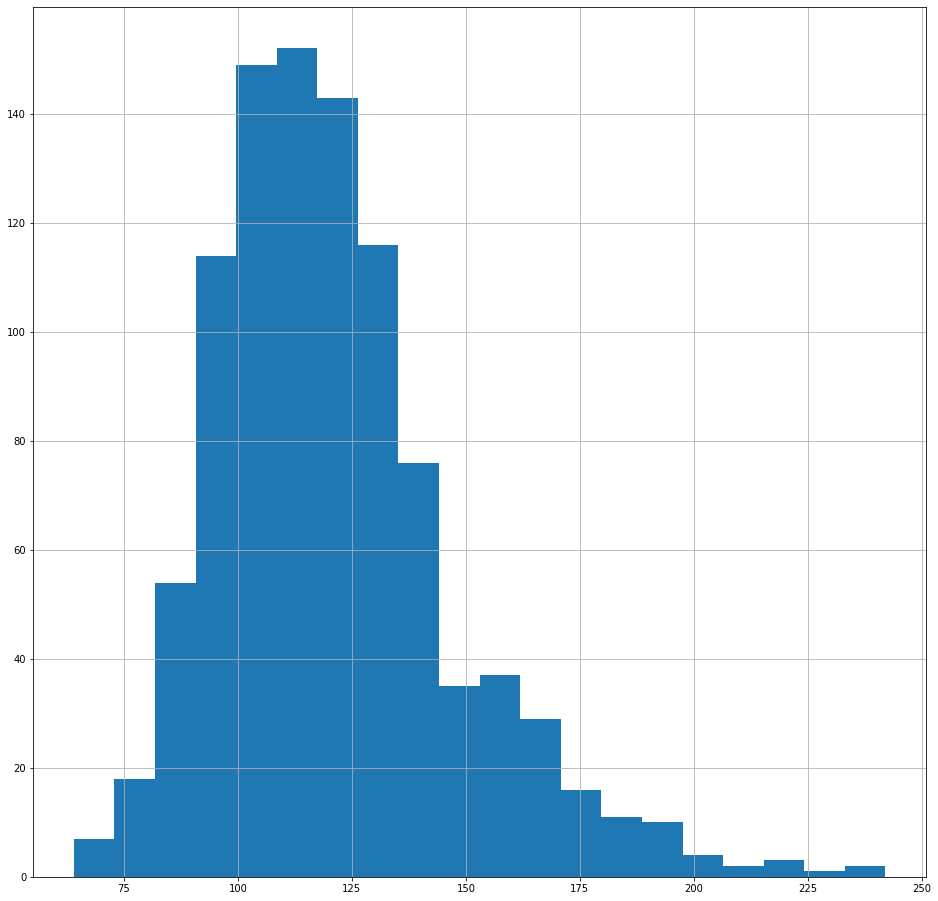

In [44]:
# Answer:
movies["duration"].hist(bins=20, figsize=(16,16))

#### Use a box plot to display that same data.

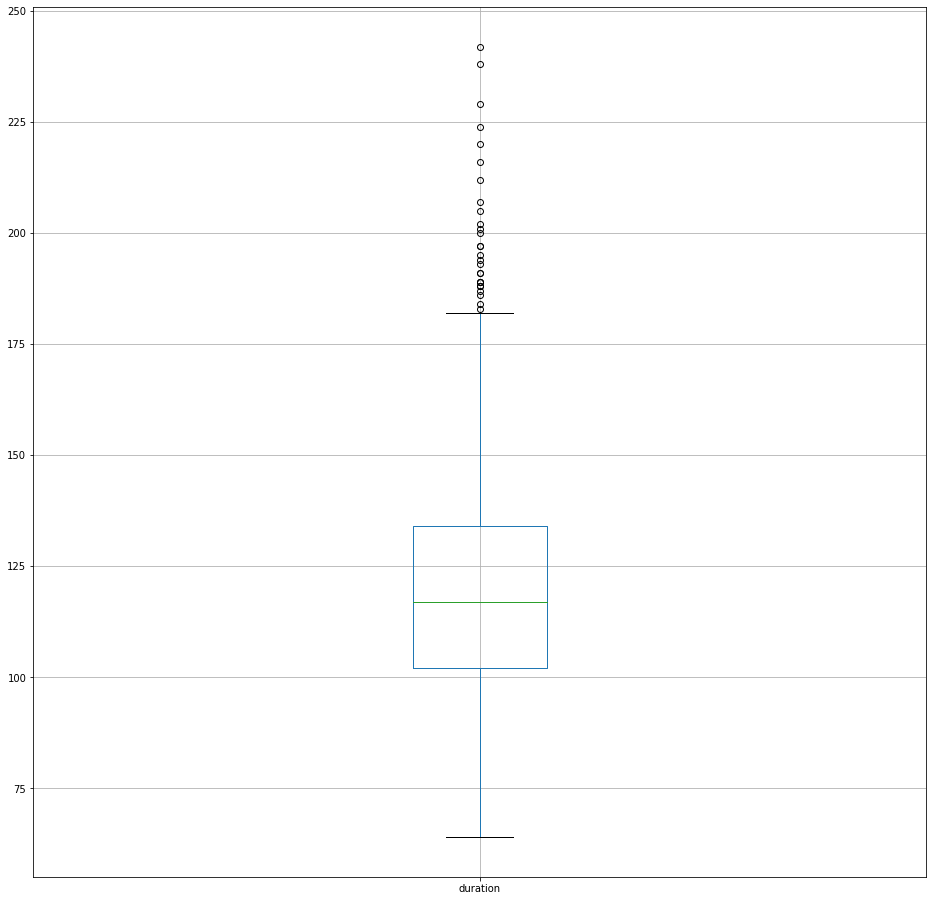

In [43]:
# Answer:
movies.boxplot(column=['duration'], figsize=(16,16))

## Intermediate level

#### Count how many movies have each of the content ratings.

In [47]:
# Answer:
movies["content_rating"].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Count of Ratings')

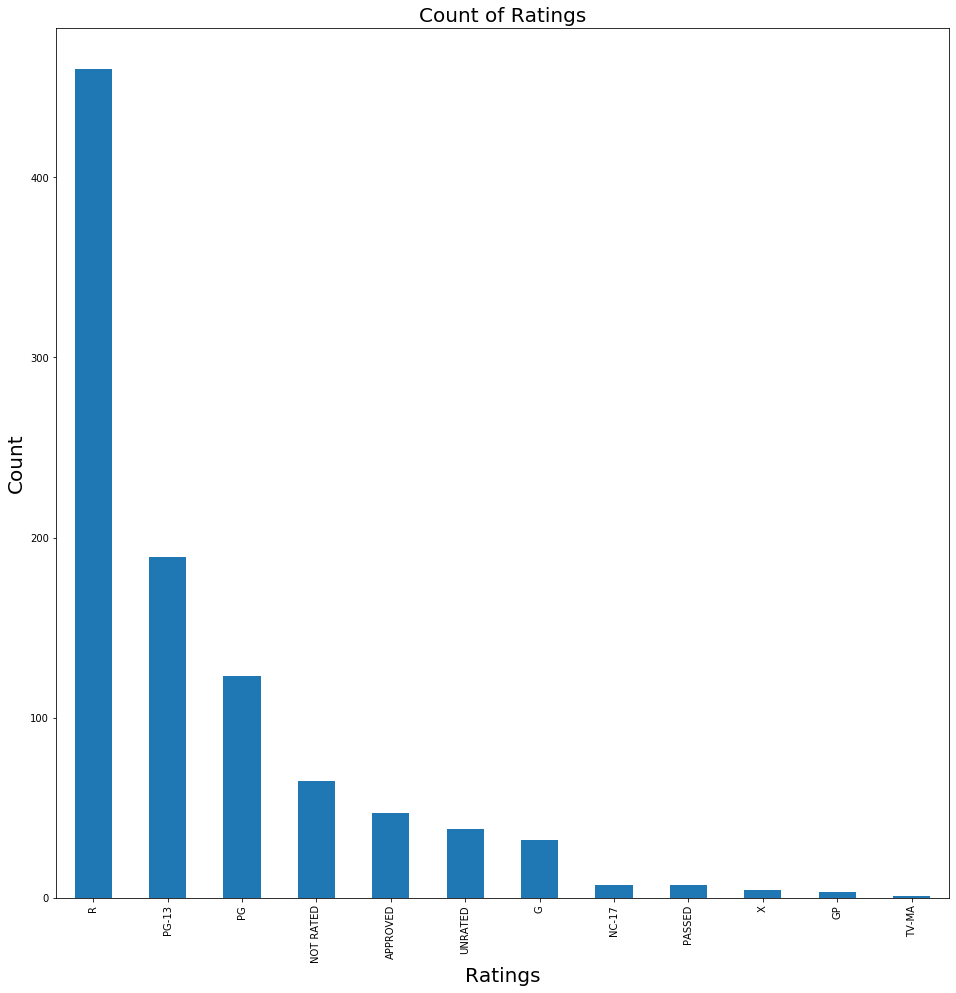

In [65]:
# Answer:
ratings = movies["content_rating"].value_counts().plot(kind="bar", figsize=(16,16))
ratings.set_xlabel("Ratings", fontdict={'fontsize': 20})
ratings.set_ylabel("Count", fontdict={'fontsize': 20})
ratings.set_title("Count of Ratings", fontdict={'fontsize':20 })

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [72]:
# Answer:
movies["content_rating"] = movies["content_rating"].replace(["NOT RATED", "APPROVED", "PASSED", "GP"], "UNRATED")

In [73]:
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [74]:
# Answer:
movies["content_rating"] = movies["content_rating"].replace(["X", "TV-MA",], "NC-17")
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [75]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [76]:
# Answer:
movies[movies["content_rating"].isna()]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [77]:
movies["content_rating"] = movies["content_rating"].fillna(value="UNRATED")

In [79]:
# Check that the "UNRATED" count increased from 160 to 163
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [81]:
# Answer:
print(movies[movies["duration"]>=120].star_rating.mean())
print(movies[movies["duration"]<=120].star_rating.mean())

7.948898678414082
7.8384898710865345


#### Use a visualization to detect whether there is a relationship between duration and star rating.

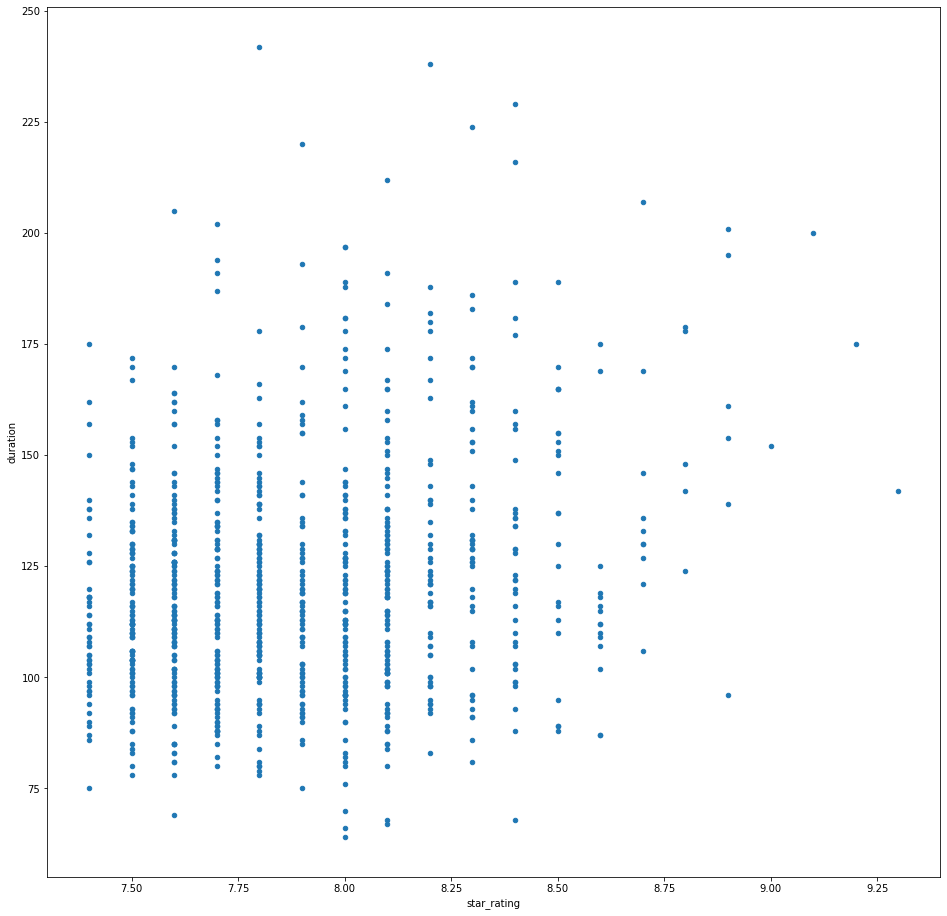

In [85]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration', figsize=(16,16))

#### Calculate the average duration for each genre.

In [86]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB72616B88>,
      dtype=object)

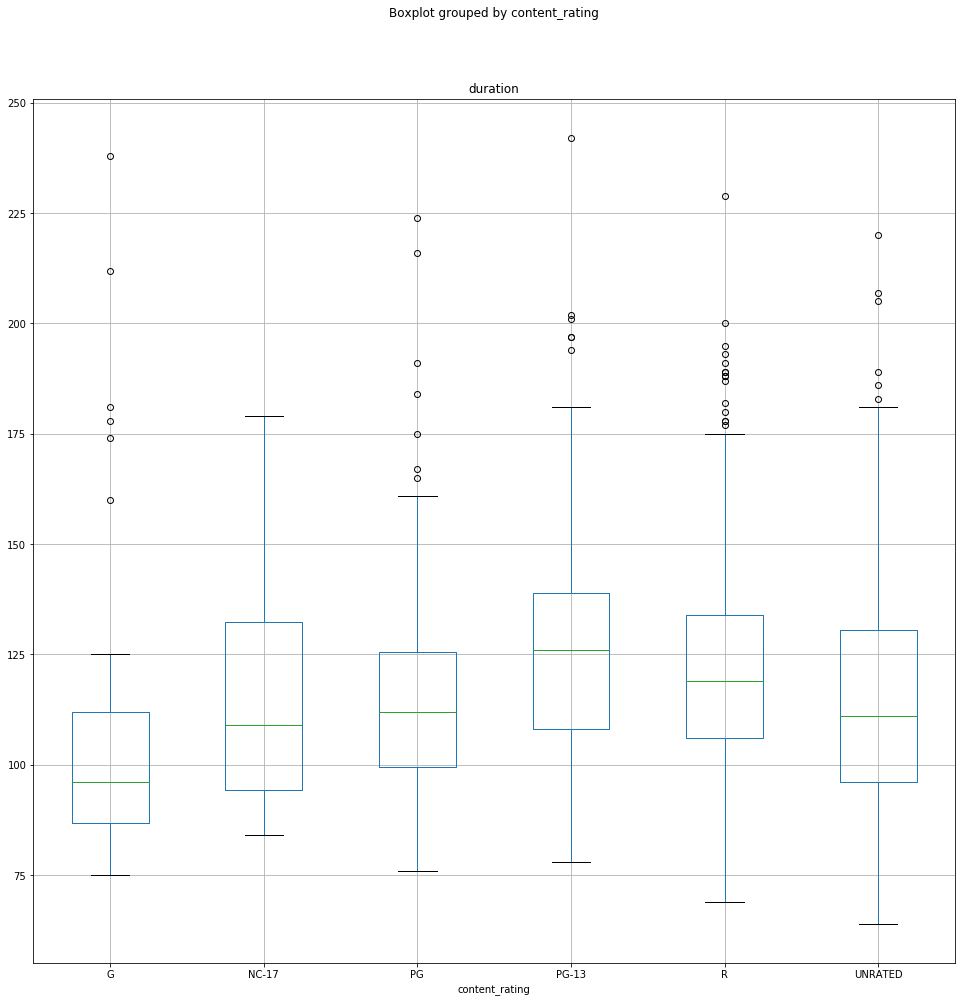

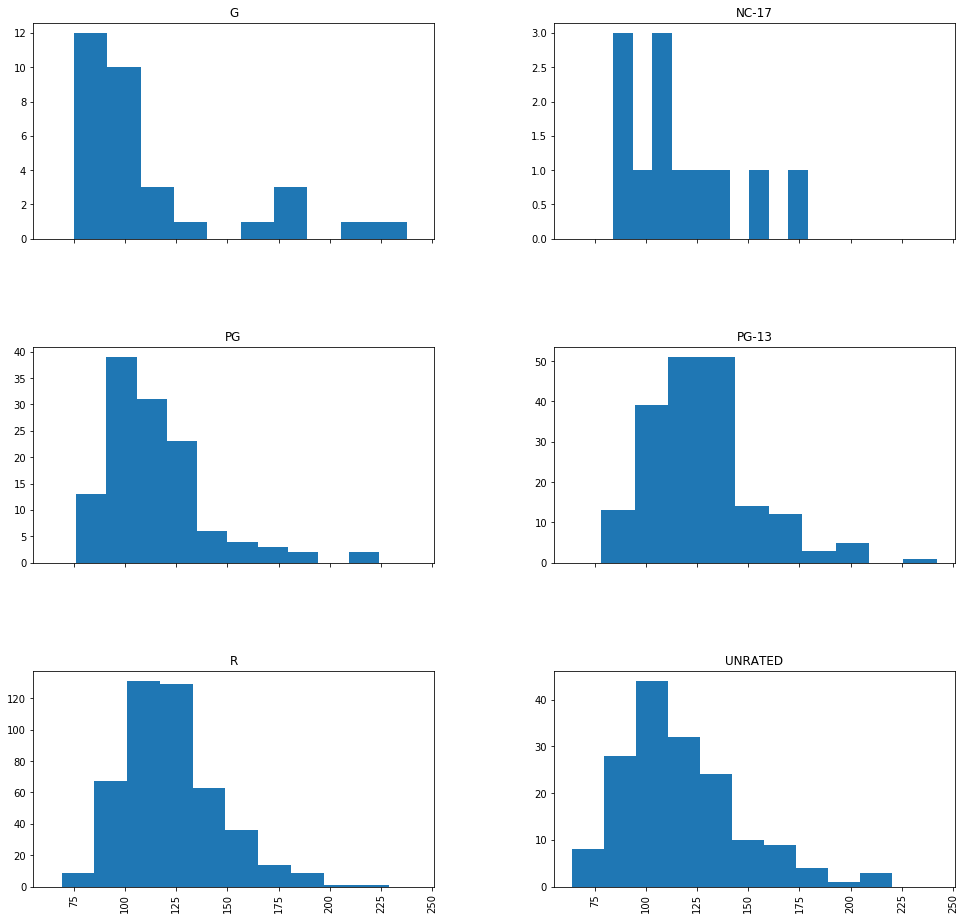

In [107]:
# Answer:
movies.boxplot(column='duration', by='content_rating', figsize=(16,16))
movies.duration.hist(by=movies.content_rating, sharex=True, figsize=(16,16))

#### Determine the top rated movie (by star rating) for each genre.

In [97]:
# Answer:
movies.groupby(['genre'])['star_rating'].nlargest(1).reset_index(level=1, drop=True)

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [108]:
# Answer:
duplicates = movies[movies['title'].duplicated()]['title']
movies[movies['title'].isin(duplicates)]


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [110]:
# Answer:
genre_rating = movies.groupby(['genre'])['star_rating'].agg(['count', 'mean'])
genre_rating[genre_rating['count'] >=10].sort_values(['count'])

,count,mean
genre,,
Mystery,16,7.975000
Horror,29,7.806897
Animation,62,7.914516
Adventure,75,7.933333
Biography,77,7.862338
Crime,124,7.916935
Action,136,7.884559
Comedy,156,7.822436
Drama,278,7.902518


## Bonus

#### Figure out something "interesting" using the actors data!